In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load and Understand the data

In [2]:
train = pd.read_csv("cab_fair_train.csv", nrows = 1000000)
## the whole trainning data set is quite huge so we sample only the first 1M rows

In [3]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null object
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


## Since there are only 10 missing data in dropoff coordinates, so let's drop them.

In [5]:
train = train.dropna()

## Now Let's Convert pickup_datetime to datetime class and extract year, day of week and hour data to see if we can find some patterns.

In [6]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
train["pickup_year"] = train["pickup_datetime"].dt.year
train["pickup_dow"] = train["pickup_datetime"].dt.dayofweek
train["pickup_hour"] = train["pickup_datetime"].dt.hour

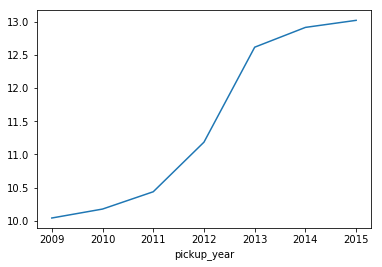

In [7]:
train.groupby("pickup_year")["fare_amount"].mean().plot()

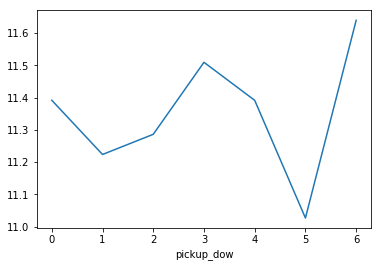

In [8]:
train.groupby("pickup_dow")["fare_amount"].mean().plot()

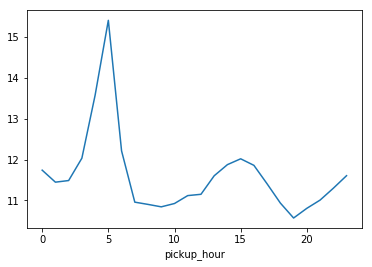

In [9]:
train.groupby("pickup_hour")["fare_amount"].mean().plot()


### From above graph we can understand that Taxi fare has 3 peaks in a day, Time : 4 to 6, 14 to 16 and 23 to 1. Fare tends to go up in after-midnight which could due to surcharge or the fact that public transportations are closed so commuters have to hire taxi instead even for long trip.

### Now Next we are curious about to what extent travel distance is relevent to taxi fare so we calculate line distance between pickup and dropoff point. We convert coordinate to distance in km because latitude and longitude have different distance (one degree of lat = 111km; one degree of long = 85km).

### So one degree of lat = 111km; one degree of long = 85km¶

In [10]:
train["move_latitude"] = (train["dropoff_latitude"] - train["pickup_latitude"]) * 111


train["move_longitude"] = (train["dropoff_longitude"] - train["pickup_longitude"]) * 85


train["abs_distance"] = np.hypot(train["move_latitude"], train["move_longitude"])

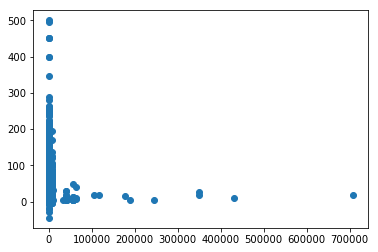

In [11]:
plt.scatter(train["abs_distance"], train["fare_amount"])

### from graph seems that distance and fare have week correlation but we see some of the travel distance are long, they might be outside of city .

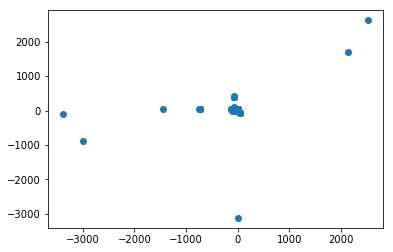

In [12]:
plt.scatter(train["pickup_longitude"], train["pickup_latitude"])





### Now From the pickup coordinates plot, indeed there are some data points are unrealistic that we need to clean up The coordinates of city is (-73.9, 40.7) and we expect pickup coordinates to be within one degree of city




In [13]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_dow,pickup_hour,move_latitude,move_longitude,abs_distance
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941,2011.741103,3.039870,13.509463,-1.008522,-0.098606,21.665121
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907,1.860761,1.949966,6.513855,918.171251,652.732766,1126.334834
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,2009.000000,0.000000,0.000000,-608957.037063,-360433.063130,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,2010.000000,1.000000,9.000000,-1.523031,-0.958120,1.216958
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,2012.000000,3.000000,14.000000,0.000000,0.031195,2.121506
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,2013.000000,5.000000,19.000000,1.555443,1.158550,3.888289
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,2015.000000,6.000000,23.000000,350435.145291,239934.790570,707630.317317


### There are three parts of abnormal data that we need to drop off before proceeding the analysis
### a. Drop pickup coordinates are not within one degree of NYC(-73.9, 40.7) Drop them
### b. travel distance Which are greater than 100 km Drop Them
### c. Drop zero or negative fare amount

In [14]:
train = train[train["fare_amount"] > 0]

longtitude_range = (train["pickup_longitude"] <= -73.4) & (train["pickup_longitude"]  >= -74.4)
latitude_range = (train["pickup_latitude"] <= 41.2) & (train["pickup_latitude"] >= 40.2)
train_trim = train[longtitude_range & latitude_range]

train_trim = train_trim[(train_trim["abs_distance"] < 100) & (train_trim["abs_distance"] > 0)]

In [15]:
train_trim.shape[0]/train.shape[0]

0

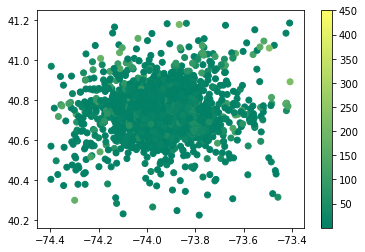

In [16]:
sc = plt.scatter(train_trim["pickup_longitude"], train_trim["pickup_latitude"], c = train_trim["fare_amount"], cmap = "summer")
plt.colorbar(sc)

### Unfortunately, by plotting out pickup coordinates with color representing fare amount we're still not able to see clear boundries seperating areas with different level of taxi fare.

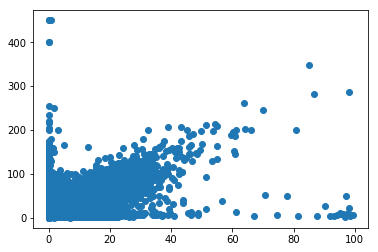

In [17]:
plt.scatter(train_trim["abs_distance"], train_trim["fare_amount"])

### After clearing abnormal data, the correlationship between travel distance and fare becomes more clear. We print out correlation coefficient of fare_amount and other variables at below, it shows 0.86 for abs_distance which is very high. Other medium-highly correlated variables are pickup_longitude and dropoff_longitude, can be explained that traveling from/to the east side of City would have higher taxi cost.

In [18]:
train_trim.corr()["fare_amount"].sort_values(ascending = False)

fare_amount          1.000000
abs_distance         0.863739
pickup_longitude     0.426462
dropoff_longitude    0.317211
pickup_year          0.118346
move_latitude        0.017087
passenger_count      0.015063
pickup_dow           0.002513
pickup_hour         -0.019109
move_longitude      -0.090367
dropoff_latitude    -0.163379
pickup_latitude     -0.208793
Name: fare_amount, dtype: float64

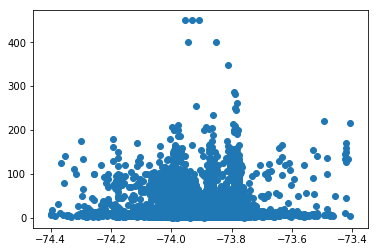

In [19]:
plt.scatter(train_trim["pickup_longitude"], train_trim["fare_amount"])

### Lastly we want to check whether travel orientation contributes to taxi fare so we categorize the data into east/west and north/south.

In [20]:
train_trim["toward_east"] = train_trim["move_longitude"] > 0
train_trim["toward_north"] = train_trim["move_latitude"] > 0


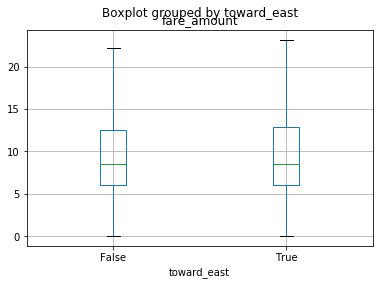

In [21]:
train_trim.boxplot(column = ["fare_amount"], by = "toward_east", showfliers = False)

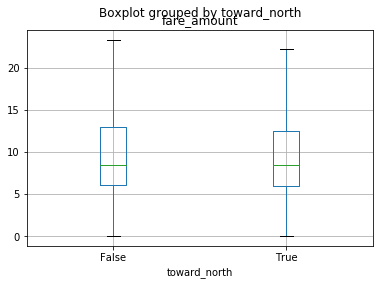

In [22]:
train_trim.boxplot(column = ["fare_amount"], by = "toward_north", showfliers = False)

### so from above graphs no matter which two of opposite orientations, the distributions of fare amount don't seem to have too much difference.

In [23]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.compose import ColumnTransformer

# Features Preprocessing Pipeline

### After exploring the data, we get to know that which are good features to feed into predictive models to predict taxi fare,

### -Categorical: pickup hour and pickup day of week

### -Numerical: pickup year, travel distance, pickup longitude and dropoff longitude

### Before training our data, we build pipelines that can handle preprocessing for each type of features respectively then combine together, for example, categorical features have to be encoded to multiple binaries as inputs and numerical features require scaling to have a better performance in certain machine learning algorithms.

In [24]:
## group pickup hour into bins in order to reduce model runtime
class HourlyBins(BaseEstimator, TransformerMixin): 
    def __init__(self, bins = 8):
        self.bins = bins
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):    
        pickup_hour_bin = np.array(pd.cut(X[X.columns[0]], self.bins))
        return pickup_hour_bin.reshape(-1, 1)

In [25]:
hour_pipe = Pipeline([
    ('hourlybins', HourlyBins()),
    ('encoder', OneHotEncoder(categories='auto', sparse = False)),
])

ct_pipe = ColumnTransformer(transformers=[
    ('hourly_cat', hour_pipe, ["pickup_hour"]),
    ('encoder', OneHotEncoder(categories='auto', sparse = False), ["pickup_dow"]),
    ('std_scaler', StandardScaler(), ["pickup_year", "abs_distance", "pickup_longitude", "dropoff_longitude"])
])

In [26]:
## build a function that can break raw data into independent variables and dependent variable for the models
def XandY(df, test_set = False):
    df = df.copy()
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
    df["pickup_year"] = df["pickup_datetime"].dt.year.astype(float)
    df["pickup_dow"] = df["pickup_datetime"].dt.dayofweek
    df["pickup_hour"] = df["pickup_datetime"].dt.hour
    df["abs_distance"] = np.hypot(df["dropoff_latitude"]-df["pickup_latitude"], df["dropoff_longitude"]-df["pickup_longitude"])
    df_X = df[["pickup_year", "pickup_dow", "pickup_hour", "abs_distance", "pickup_longitude", "dropoff_longitude"]]
    if test_set == True:
        return df_X
    else:
        df_y = df["fare_amount"]
        return df_X, df_y

train_X, train_y = XandY(train_trim)

# Now Apply Different Regression Models to Predict More Accurate Fair

# Linear Regression

In [27]:
lr_pipe = Pipeline([
    ('ct', ct_pipe),
    ('lin_reg', LinearRegression())
]) 
lr_score = cross_val_score(lr_pipe, train_X, train_y, scoring = "neg_mean_squared_error", cv = 5)
lr_rmse = np.sqrt(-lr_score)
lr_rmse.mean()

4.5942891344722669

# Polynomial Regression

### Before fitting a polynomial regression, we have to add polynomial features for numerical variables, we build this into preprocessing pipelines then we can do grid search on different degrees of polynomial more easily.

In [28]:
poly_pipe = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('std_scaler', StandardScaler())
])

poly_ct_pipe = ColumnTransformer(transformers=[
    ('hourly_cat', hour_pipe, ["pickup_hour"]),
    ('encoder', OneHotEncoder(categories='auto', sparse = False), ["pickup_dow"]),
    ('poly', poly_pipe, ["pickup_year", "abs_distance", "pickup_longitude", "dropoff_longitude"])
])

polyreg_pipe = Pipeline([
    ('poly_ct', poly_ct_pipe),
    ('reg', LinearRegression())
])

param_grid = {'poly_ct__poly__poly_features__degree': [2,3,5], 'poly_ct__poly__poly_features__include_bias': [False, True]}
polyreg_gs = GridSearchCV(polyreg_pipe, param_grid, cv = 5, scoring = "neg_mean_squared_error")
polyreg_gs.fit(train_X, train_y)
polyreg_gs.best_params_

{'poly_ct__poly__poly_features__degree': 3,
 'poly_ct__poly__poly_features__include_bias': True}

In [29]:
np.sqrt(-polyreg_gs.best_score_)

4.2104961516043504

### So Polynomial regression improves the prediction error by 8%.

# Random Forest Regression

In [30]:
rfr_pipe = Pipeline([
    ('ct', ct_pipe),
    ('forest_reg', RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 3))
])

rfr_score = cross_val_score(rfr_pipe, train_X, train_y, scoring = "neg_mean_squared_error", cv = 5)
rfr_rmse = np.sqrt(-rfr_score)
rfr_rmse.mean()

4.0534650048390706

### Random forest regression so far the best performer before even tuning the hyperparameters so we're keen to see if we can bring down the error with grid searches.

In [31]:
param_grid = {'forest_reg__n_estimators': [10, 20], 'forest_reg__max_features': [4, 8, 'auto']}
forest_gs = GridSearchCV(rfr_pipe, param_grid, cv = 5, scoring = "neg_mean_squared_error")
forest_gs.fit(train_X, train_y)
forest_gs.best_params_

{'forest_reg__max_features': 8, 'forest_reg__n_estimators': 20}

In [32]:
np.sqrt(-forest_gs.best_score_)


3.9138987431342041

In [33]:

np.sqrt(-forest_gs.cv_results_["mean_test_score"])

array([ 4.10013607,  3.98669732,  4.01173281,  3.91389874,  4.05675042,
        3.96155833])

### From the grid search results we see different max_features don't make too much difference in error, so as n_estimators, however we see with bigger estimators the errors are improved consistently so it's worth to try an even bigger n_estimators.

# SVM Regression

In [35]:
svr_pipe = Pipeline([
    ('ct', ct_pipe),
    ('lin_svr', LinearSVR())
]) 

param_grid = {'lin_svr__epsilon': [0.5, 1, 2, 4]}
svr_gs = GridSearchCV(svr_pipe, param_grid, cv = 5, scoring = "neg_mean_squared_error")
svr_gs.fit(train_X, train_y)
svr_gs.best_params_

{'lin_svr__epsilon': 2}

In [36]:
np.sqrt(-svr_gs.best_score_)

4.6060671599342173

### Linear SVR yields the similar performance as linear regression after grid search. So We Can try another non-linear SVR with RBF kernel.

# Apply Model to Test Set

### Now we've tested a handful of models and decide to choose forest_gs.best_estimator as the final model since it has both accuracy and speed. Next step is to show how to apply the model to new test data and make predictions.

In [38]:
test = pd.read_csv("cab_fair_test.csv")

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [40]:
test_X = XandY(test, test_set = True)

In [41]:
final_model = forest_gs.best_estimator_

In [42]:
test["fare_amount_pred"] = final_model.predict(test_X)

In [43]:
test.head(10)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_pred
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,13.2500
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,11.6250
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,4.4600
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,9.5250
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,13.0250
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1,11.2000
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1,5.6400
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1,49.0685
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1,10.3800
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1,6.4750


## So finally We Make The Predictions for Cab(Taxi) Fair.